Iván Vázquez Martínez

# Examen OPI Analytics

## Sección A

### 1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? 

1. Primero usar el metodo info sobre el dataframe para saber cuantas filas contiene el df y de qué tipo de dato es cada columna
2. Usar el metodo head() para observar algunos datos del dataframe para familiarizarse con los datos.
3. Usar el metodo isnull().sum() para saber la cantidad de datos faltantes en cada columna.
4. De acuerdo al paso anterior, decidir un método para lidiar con los valores faltantes en cada columna.
5. Cambiar el tipo de dato de las columnas para que se pueda trabajar con los datos con mayor facilidad.
6. Checar que no haya datos string repetidos o con pequeñas diferencias (espacios en blanco antes y despues de las palabras, por ejemplo)


Importamos los datos (descargados de manera local):

In [23]:
import pandas as pd
url = "https://archivo.datos.cdmx.gob.mx/carpetas_completa_2016_2020.csv"
path = r"C:\Users\sephc\Python\carpetas_completa_2016_2020.csv"
df = pd.read_csv(path,engine='python',encoding = "utf-8")

df.head(5)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151850 entries, 0 to 1151849
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1151417 non-null  float64
 1   mes_hechos            1151417 non-null  object 
 2   fecha_hechos          1151417 non-null  object 
 3   ao_inicio             1151850 non-null  int64  
 4   mes_inicio            1151850 non-null  object 
 5   fecha_inicio          1151850 non-null  object 
 6   delito                1151850 non-null  object 
 7   fiscalia              1151848 non-null  object 
 8   agencia               1151850 non-null  object 
 9   unidad_investigacion  1151623 non-null  object 
 10  categoria_delito      1151850 non-null  object 
 11  calle_hechos          1148903 non-null  object 
 12  calle_hechos2         453177 non-null   object 
 13  colonia_hechos        1105064 non-null  object 
 14  alcaldia_hechos       1148704 non-

Podemos hacer varias cosas para mejorar la calidad de estos datos:

1. Crear columnas donde se indiquen los meses y años en tipo fecha

2. Quitar filas que no tienen fecha_hechos ya que sin ese dato no podemos hacer un analisis temporal y no podemos inferir esa fecha

3. Columnas_fechas = ["fecha_hechos","fecha_inicio"] convertir estas columnas a tipo datetime.

### 2. ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

Aquí se consideran todas las filas del dataset inicial:

In [33]:
print("Delitos registrados: ",df.shape[0])

print("El rango de tiempo que se considera en cada delito es la fecha de los hechos (aproximada o exacta) y la fecha de registro del delito")

Delitos registrados:  1151850
El rango de tiempo que se considera en cada delito es la fecha de los hechos (aproximada o exacta) y la fecha de registro del delito


### 3. ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

In [40]:
#delitos diferentes registrados:
delitos = df["delito"].unique().tolist()
len(delitos)


341

Notemos que se registran delitos en municipios fuera de CDMX:

In [60]:
municipios = df["alcaldia_hechos"].unique().tolist()

municipios[:21]

['BENITO JUAREZ',
 'IZTAPALAPA',
 'CUAUHTEMOC',
 'TLAHUAC',
 'IZTACALCO',
 'GUSTAVO A MADERO',
 'MIGUEL HIDALGO',
 'TLALPAN',
 'ALVARO OBREGON',
 'VENUSTIANO CARRANZA',
 'AZCAPOTZALCO',
 'CUAJIMALPA DE MORELOS',
 'COYOACAN',
 'XOCHIMILCO',
 'LA MAGDALENA CONTRERAS',
 'MILPA ALTA',
 'TLALNEPANTLA DE BAZ',
 'VERACRUZ',
 'IXCATEOPAN DE CUAUHTEMOC',
 'TUXPAM',
 'HUIXQUILUCAN',
 'OCOYOACAC',
 'ECATEPEC DE MORELOS',
 nan,
 'SIN DATO',
 'TULTEPEC',
 'ACATZINGO',
 'GUELATAO DE JUAREZ',
 'HERMOSILLO',
 'ENSENADA',
 'IXTAPALUCA',
 'NAUCALPAN DE JUAREZ',
 'NEZAHUALCOYOTL',
 'CHALCO',
 'TLATLAYA',
 'SAN JUAN GUICHICOVI',
 'ZAPOPAN',
 'SAN PEDRO IXTLAHUACA',
 'NICOLAS ROMERO',
 'VICTORIA',
 'CULIACAN',
 'VALLE DE CHALCO SOLIDARIDAD',
 'TIANGUISTENCO',
 'TEHUACAN',
 'ACAPULCO DE JUAREZ',
 'TEMASCALCINGO',
 'CUAUTITLAN IZCALLI',
 'TIJUANA',
 'CUERNAVACA',
 'TENANGO DEL VALLE',
 'TULANCINGO DE BRAVO',
 'CORREGIDORA',
 'JUAREZ HIDALGO',
 'CELAYA',
 'CHICOLOAPAN',
 'ATIZAPAN DE ZARAGOZA',
 'TOLUCA',
 'T

Por lo que creamos una lista con los nombres de las alcaldias de la CDMX:

In [19]:
alcaldiascdmx = ["ALVARO OBREGON","AZCAPOTZALCO","BENITO JUAREZ","COYOACAN","CUAJIMALPA DE MORELOS","CUAUHTEMOC","GUSTAVO A MADERO",
                "IZTACALCO","IZTAPALAPA","LA MAGDALENA CONTRERAS","MIGUEL HIDALGO","MILPA ALTA","TLAHUAC","TLALPAN",
                "VENUSTIANO CARRANZA","XOCHIMILCO"]
len(alcaldiascdmx)

16

Creamos un dataframe con datos solo de CDMX:

In [24]:
dfcdmx = df[df["alcaldia_hechos"].isin(alcaldiascdmx)]

dfcdmx.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114


In [110]:
df_delitos= dfcdmx[["alcaldia_hechos","delito"]]

df_agrupado = df_delitos.groupby("alcaldia_hechos").nunique()

df_agrupado["delito"]

alcaldia_hechos
ALVARO OBREGON            282
AZCAPOTZALCO              271
BENITO JUAREZ             279
COYOACAN                  275
CUAJIMALPA DE MORELOS     233
CUAUHTEMOC                312
GUSTAVO A MADERO          292
IZTACALCO                 261
IZTAPALAPA                301
LA MAGDALENA CONTRERAS    227
MIGUEL HIDALGO            282
MILPA ALTA                204
TLAHUAC                   252
TLALPAN                   274
VENUSTIANO CARRANZA       265
XOCHIMILCO                267
Name: delito, dtype: int64

Creamos un grafico de barras:

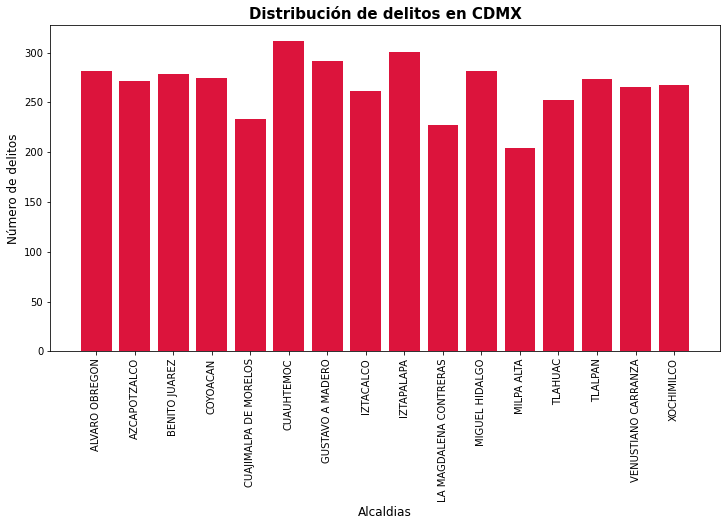

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize =(12,6))
plt.bar(alcaldiascdmx,df_agrupado["delito"],color = "crimson")

plt.title("Distribución de delitos en CDMX",fontdict ={"fontweight":"bold", "fontsize":15})
plt.xlabel("Alcaldias",fontdict ={"fontsize":12})
plt.ylabel("Número de delitos",fontdict ={"fontsize":12})
plt.xticks(rotation='vertical')

plt.show()

#### Los 5 delitos más frecuentes son:

In [51]:
delit_freq = df["delito"].value_counts()

delit_freq.head()

VIOLENCIA FAMILIAR              113712
FRAUDE                           69387
ROBO DE OBJETOS                  68222
ROBO A NEGOCIO SIN VIOLENCIA     65024
AMENAZAS                         60043
Name: delito, dtype: int64

### 4. Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

In [21]:
from datetime import datetime

Comprobamos que hay valores faltantes en "fecha_hechos":

In [25]:
dfcdmx[["fecha_hechos","fecha_inicio"]].isnull().sum()

fecha_hechos    419
fecha_inicio      0
dtype: int64

Quitamos las filas con valores faltantes en la columna "fecha_hechos":

In [26]:
dfcdmx.dropna(subset=["fecha_hechos"],inplace=True)

<ipython-input-26-22c4e3293d3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcdmx.dropna(subset=["fecha_hechos"],inplace=True)


Checamos que ya no hay valores faltantes en "fecha_hechos":

In [28]:
dfcdmx[["fecha_hechos","fecha_inicio"]].isnull().sum()

fecha_hechos    0
fecha_inicio    0
dtype: int64

In [29]:
dfcdmx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139636 entries, 0 to 1151849
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1139636 non-null  float64
 1   mes_hechos            1139636 non-null  object 
 2   fecha_hechos          1139636 non-null  object 
 3   ao_inicio             1139636 non-null  int64  
 4   mes_inicio            1139636 non-null  object 
 5   fecha_inicio          1139636 non-null  object 
 6   delito                1139636 non-null  object 
 7   fiscalia              1139634 non-null  object 
 8   agencia               1139636 non-null  object 
 9   unidad_investigacion  1139413 non-null  object 
 10  categoria_delito      1139636 non-null  object 
 11  calle_hechos          1137112 non-null  object 
 12  calle_hechos2         447517 non-null   object 
 13  colonia_hechos        1104701 non-null  object 
 14  alcaldia_hechos       1139636 non-

Convertimos "fecha_hechos" a datetime:

In [30]:
dfcdmx["fecha_hechos_dt"] = dfcdmx["fecha_hechos"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

dfcdmx["fecha_hechos_dt"]

<ipython-input-30-69b7e13bd85d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcdmx["fecha_hechos_dt"] = dfcdmx["fecha_hechos"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


0         2016-01-31 22:16:00
1         2016-01-31 20:50:00
2         2016-02-01 00:30:00
3         2016-01-31 22:00:00
4         2015-12-25 12:00:00
                  ...        
1151845   2021-01-01 03:30:00
1151846   2021-01-31 23:00:00
1151847   2021-01-31 17:00:00
1151848   2021-01-31 21:00:00
1151849   2021-01-01 11:47:00
Name: fecha_hechos_dt, Length: 1139636, dtype: datetime64[ns]

De esta columna podemos crear las columnas "ao_hechos_dt" y "mes_hechos_dt" en formato datetime:

In [33]:
dfcdmx["ao_hechos_dt"] = dfcdmx["fecha_hechos_dt"].apply(lambda x: x.year)
dfcdmx["mes_hechos_dt"] = dfcdmx["fecha_hechos_dt"].apply(lambda x: x.month)

dfcdmx[["ao_hechos_dt","mes_hechos_dt"]]

<ipython-input-33-3ae3910162b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcdmx["ao_hechos_dt"] = dfcdmx["fecha_hechos_dt"].apply(lambda x: x.year)
<ipython-input-33-3ae3910162b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcdmx["mes_hechos_dt"] = dfcdmx["fecha_hechos_dt"].apply(lambda x: x.month)


,ao_hechos_dt,mes_hechos_dt
0,2016,1
1,2016,1
2,2016,2
3,2016,1
4,2015,12
...,...,...
1151845,2021,1
1151846,2021,1
1151847,2021,1
1151848,2021,1


Filtramos los datos del ultimo año (2020) y seleccionamos las columnas utiles para este caso:

In [37]:
df_año = dfcdmx[dfcdmx["ao_hechos_dt"].isin([2020])]

df_delitos_mes = df_año[["mes_hechos","delito"]]

df_delitos_mes.tail()

,mes_hechos,delito
1151807,Octubre,ROBO DE DOCUMENTOS
1151808,Diciembre,ROBO A REPARTIDOR CON VIOLENCIA
1151812,Diciembre,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...
1151828,Diciembre,AMENAZAS
1151838,Septiembre,VIOLENCIA FAMILIAR


Agrupamos por mes:

In [38]:
df_grouped = df_delitos_mes.groupby("mes_hechos").nunique()

#creamos un diccionario con mes y numero de delistos:
diccionario = df_grouped.delito.to_dict()

#creamos lista para ordenar:
mi_orden = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

#ordenamos el diccionario de acuerdo a meses:
dict_ordenado = {c:diccionario[c] for c in mi_orden}

dict_ordenado


{'Enero': 218,
 'Febrero': 230,
 'Marzo': 230,
 'Abril': 207,
 'Mayo': 201,
 'Junio': 208,
 'Julio': 219,
 'Agosto': 227,
 'Septiembre': 215,
 'Octubre': 218,
 'Noviembre': 215,
 'Diciembre': 207}

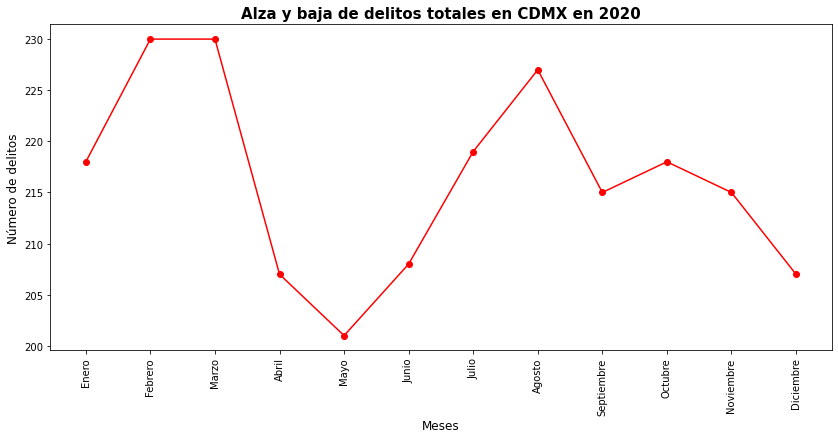

In [52]:
import matplotlib.pyplot as plt

lists = dict_ordenado.items() # sorted by key, return a list of tuples


x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize =(14,6))
plt.plot(x, y,color="r",marker = "o")
plt.title("Alza y baja de delitos totales en CDMX en 2020",fontdict ={"fontweight":"bold", "fontsize":15})
plt.xlabel("Meses",fontdict ={"fontsize":12})
plt.ylabel("Número de delitos",fontdict ={"fontsize":12})
plt.xticks(rotation='vertical')
plt.show()

Consideramos los primeros 5 delitos más frecuentes:

In [55]:
delitosfrec = delit_freq.head().index.tolist()

delitosfrec

['VIOLENCIA FAMILIAR',
 'FRAUDE',
 'ROBO DE OBJETOS',
 'ROBO A NEGOCIO SIN VIOLENCIA',
 'AMENAZAS']

In [91]:
delitodf = df_año[df_año["delito"]== delitosfrec[0]]

delitofil = delitodf[["mes_hechos"]]



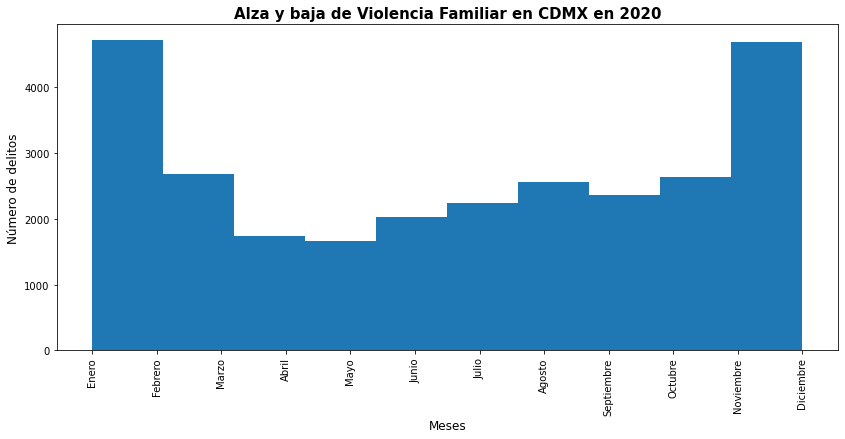

In [94]:
plt.figure(figsize =(14,6))
plt.hist(delitofil)
plt.title("Alza y baja de Violencia Familiar en CDMX en 2020",fontdict ={"fontweight":"bold", "fontsize":15})
plt.xlabel("Meses",fontdict ={"fontsize":12})
plt.ylabel("Número de delitos",fontdict ={"fontsize":12})
plt.xticks(rotation='vertical')
plt.show()

Podemos usar un ciclo for para verificar el mismo histograma para los diferentes delitos.

### 5. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

In [178]:
df_agrupado["delito"].sort_values(ascending=False)

alcaldia_hechos
CUAUHTEMOC                312
IZTAPALAPA                301
GUSTAVO A MADERO          292
MIGUEL HIDALGO            282
ALVARO OBREGON            282
BENITO JUAREZ             279
COYOACAN                  275
TLALPAN                   274
AZCAPOTZALCO              271
XOCHIMILCO                267
VENUSTIANO CARRANZA       265
IZTACALCO                 261
TLAHUAC                   252
CUAJIMALPA DE MORELOS     233
LA MAGDALENA CONTRERAS    227
MILPA ALTA                204
Name: delito, dtype: int64

In [183]:
print("La alcaldia con más delitos es: ",df_agrupado["delito"].sort_values(ascending=False).index[0], "con ",\
      df_agrupado["delito"].sort_values(ascending=False)[0], "delitos")

print("La alcaldia con menos delitos es: ",df_agrupado["delito"].sort_values(ascending=False).index[15], "con ",\
      df_agrupado["delito"].sort_values(ascending=False)[15], "delitos")


La alcaldia con más delitos es:  CUAUHTEMOC con  312 delitos
La alcaldia con menos delitos es:  MILPA ALTA con  204 delitos


### 6. Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

Añadimos una columna para contar cada delito:

In [189]:
dfcdmx["count"]=1

<ipython-input-189-d6928caa8ef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcdmx["count"]=1


Agrupamos por "alcaldia_hechos" y por "colonia_hechos" para contar los delitos en cada colonia:

In [190]:
tres_colonias = dfcdmx.groupby(["alcaldia_hechos","colonia_hechos"]).agg({'count':sum})
tres_colonias_group = tres_colonias["count"].groupby(level=0, group_keys=False)
df_tres = tres_colonias_group.apply(lambda x: x.sort_values(ascending=False).head(3))
df_tres

alcaldia_hechos         colonia_hechos                  
ALVARO OBREGON          JARDINES DEL PEDREGAL                3508
                        SAN ANGEL                            2750
                        ZEDEC SANTA FE                       2658
AZCAPOTZALCO            EL ROSARIO                           3990
                        INDUSTRIAL VALLEJO                   2606
                        CENTRO DE AZCAPOTZALCO               2440
BENITO JUAREZ           DEL VALLE CENTRO                    16967
                        NARVARTE                            12390
                        PORTALES SUR                         6373
COYOACAN                PEDREGAL DE SANTO DOMINGO            6672
                        AJUSCO                               3602
                        PEDREGAL DE SANTA URSULA             3529
CUAJIMALPA DE MORELOS   CUAJIMALPA                           2512
                        LOMAS DE SANTA FE                    2382
                   

### 7. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

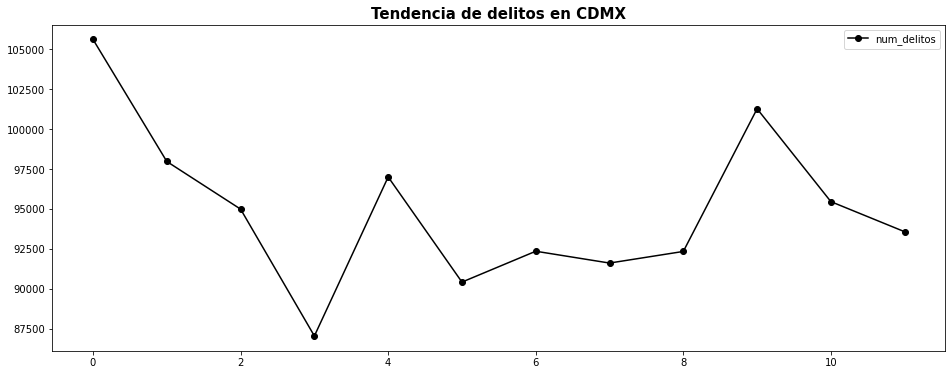

In [212]:
grup_mes = dfcdmx.groupby(["mes_hechos"]).count()["contador"]
mi_orden = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

# loop para ordenar los meses de acuerdo a calendario

orden = []
for i in range(len(grup_mes)):
    for j in range(len(mi_orden)):
        if grup_mes.keys()[i] == mi_orden[j]:
            orden.append([mi_orden[i],grup_mes[j]])

dforden = pd.DataFrame(orden,columns=["grup_mes","num_delitos"])

#graficamos
dforden.plot(figsize=(16,6),marker= "o",color = "black")
plt.title("Tendencia de delitos en CDMX",fontdict ={"fontweight":"bold", "fontsize":15})
plt.show()

Los meses están indicados según:

In [210]:
order_mes

{'Enero': 0,
 'Febrero': 1,
 'Marzo': 2,
 'Abril': 3,
 'Mayo': 4,
 'Junio': 5,
 'Julio': 6,
 'Agosto': 7,
 'Septiembre': 8,
 'Octubre': 9,
 'Noviembre': 10,
 'Diciembre': 11}

### 8. ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

Similar al inciso 6: 

In [208]:
delitos_caract = dfcdmx.groupby(["alcaldia_hechos","delito"]).agg({'contador':sum})
grup = delitos_caract["contador"].groupby(level=1, group_keys=False)
df_del_3 = grup.apply(lambda x: x.sort_values(ascending=False)[:1])
df_del_3

alcaldia_hechos  delito                                              
CUAUHTEMOC       ABANDONO DE PERSONA                                       652
IZTAPALAPA       ABORTO                                                    105
CUAUHTEMOC       ABUSO DE AUTORIDAD                                       1291
IZTAPALAPA       ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA      969
CUAUHTEMOC       ABUSO DE CONFIANZA                                       3235
                                                                         ...  
                 VIOLACION TUMULTUARIA                                      27
IZTAPALAPA       VIOLACION TUMULTUARIA EQUIPARADA                            1
XOCHIMILCO       VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO               1
ALVARO OBREGON   VIOLACION Y ROBO DE VEHICULO                                1
IZTAPALAPA       VIOLENCIA FAMILIAR                                      20734
Name: contador, Length: 340, dtype: int64

### 9. Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).

Filtramos los datos con la mascara "categoria_delito" == "HOMICIDIO DOLOSO", agrupamos por alcaldia contando el numero de delitos y calculamos la razon entre el numero de homicidios dolosos por cada 100000 habitantes:

In [216]:
filtro_HD = dfcdmx[dfcdmx.categoria_delito=="HOMICIDIO DOLOSO"]
grup_alcaldia = filtro_HD.groupby("alcaldia_hechos").count()

grup_alcaldia["count"]/100000


alcaldia_hechos
ALVARO OBREGON            0.00460
AZCAPOTZALCO              0.00230
BENITO JUAREZ             0.00119
COYOACAN                  0.00235
CUAJIMALPA DE MORELOS     0.00055
CUAUHTEMOC                0.00594
GUSTAVO A MADERO          0.01037
IZTACALCO                 0.00233
IZTAPALAPA                0.01410
LA MAGDALENA CONTRERAS    0.00094
MIGUEL HIDALGO            0.00250
MILPA ALTA                0.00070
TLAHUAC                   0.00281
TLALPAN                   0.00470
VENUSTIANO CARRANZA       0.00515
XOCHIMILCO                0.00246
Name: count, dtype: float64

### 10. ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

Por alcaldía , de acuerdo al número de delitos por mes, indicando un color para cada nivel de insegurirar. Por ejemplo, las alcaldías con mayor número de delitos indicarlos con un color rojo, le siguen los de color naranja con un nivel menor , luego de color amarillo y las alcaldías más seguras con un color verde. Esto se puede hacer implementando una variable categórica y de manera geofráfica, pintando las alcaldías de distintos colores:

In [228]:
razones = grup_alcaldia["count"]/100
dict1 = razones.to_dict()
dict1 

{'ALVARO OBREGON': 4.6,
 'AZCAPOTZALCO': 2.3,
 'BENITO JUAREZ': 1.19,
 'COYOACAN': 2.35,
 'CUAJIMALPA DE MORELOS': 0.55,
 'CUAUHTEMOC': 5.94,
 'GUSTAVO A MADERO': 10.37,
 'IZTACALCO': 2.33,
 'IZTAPALAPA': 14.1,
 'LA MAGDALENA CONTRERAS': 0.94,
 'MIGUEL HIDALGO': 2.5,
 'MILPA ALTA': 0.7,
 'TLAHUAC': 2.81,
 'TLALPAN': 4.7,
 'VENUSTIANO CARRANZA': 5.15,
 'XOCHIMILCO': 2.46}

In [229]:
maxval_dict = 14.1
minval_dict = 0.7

(maxval_dict-minval_dict)/4


3.35

Por lo que los intervalos que tomamos para cada categoria miden 3.35:

dict_categorias ={"Verde":r<=3.35, "Amarillo": r <= 6.7, "Naranja": r<=10.05, "Rojo" r >10.05}

### 11. Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados).

### 11.1 ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?

### 12. Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?